# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables with PRICE: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

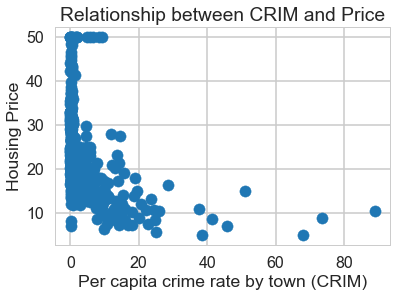

In [13]:
# Scatter plot between *CRIM* and *PRICE*
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Text(0.5,1,'Distribution of Crime Rate')

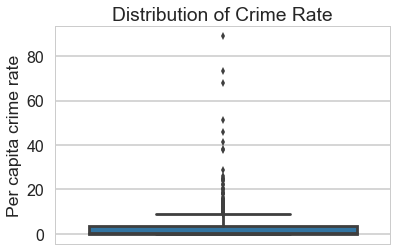

In [14]:
# Plot a boxplot to see if there are any outliers in variable CRIM
sns.boxplot(y=bos.CRIM);
plt.ylabel("Per capita crime rate")
plt.title("Distribution of Crime Rate")

In [15]:
# Correlation between CRIM and PRICE
bos.CRIM.corr(bos.PRICE)

-0.38583168988399064

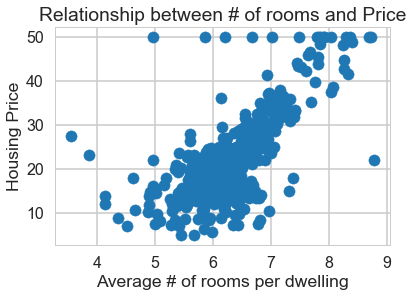

In [16]:
# scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average # of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between # of rooms and Price");

Text(0.5,1,'Relationship between Pupil-Teacher Ratio and Price')

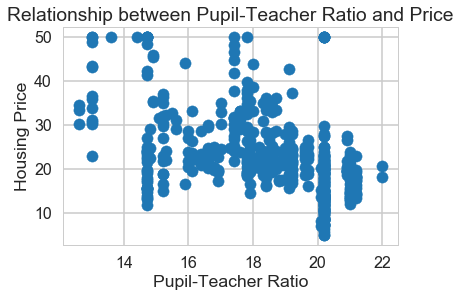

In [17]:
# scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil-Teacher Ratio and Price")

In [18]:
# Correlation between RM and PRICE
bos.RM.corr(bos.PRICE)

0.6953599470715393

In [19]:
# Correlation between PTRATIO and PRICE
bos.PTRATIO.corr(bos.PRICE)

-0.5077866855375622

Text(0.5,1,'Relationship between Poverty and Price')

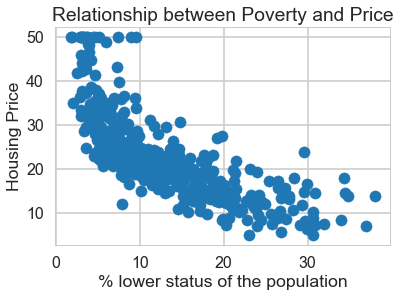

In [20]:
# scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between Poverty and Price")


Text(0.5,1,'Relationship between Age of House and Price')

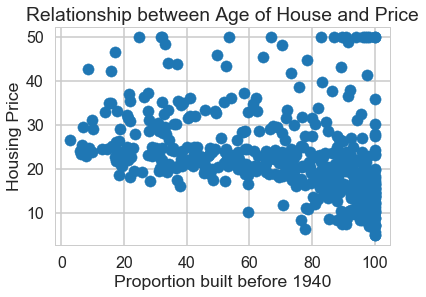

In [21]:
# scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion built before 1940")
plt.ylabel("Housing Price")
plt.title("Relationship between Age of House and Price")

Text(0.5,1,'Relationship between Property Tax Rate and Price')

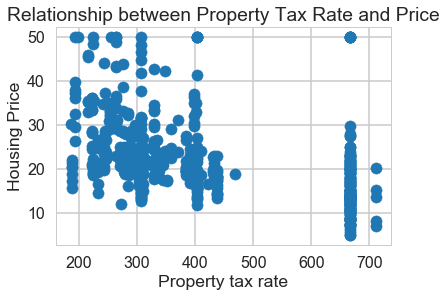

In [22]:
# scatter plot between *TAX* and *PRICE*
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Property tax rate")
plt.ylabel("Housing Price")
plt.title("Relationship between Property Tax Rate and Price")

In [23]:
# Correlation between various predictors and PRICE
bos.corr()[['PRICE']]

,PRICE
CRIM,-0.385832
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


### <font color='brown'> Part 2 Exercise Set I: Answers </font>

There is a weak negative correlation (-0.39) between crime rate and housing price. As you can see in the above box plot there are quite a few outliers.

There is a medium positive correlation (0.7) between RM (average number of rooms per dwelling) and housing price, and a medium negative correlation (-0.51) between PTRATIO (Pupil-Teacher Ratio) and housing price.

I think the following numerical variables are interesting:

LSTAT (% lower status of the population): This variable indicates the poverty level in a neighborhodd. In neighborhoods with highest poverty, house prices should be lower. So I expected a negative correlation between LSTAT and PRICE. Indeed, there is a strong negative correlation (-0.74) between these two variables.

AGE (proportion of owner-occupied units built prior to 1940): As older houses are generally cheaper, I expected a negative correlation between AGE and PRICE. Although there is a negative correlation (-0.38), it is week.

TAX (full-value property-tax rate per \$10,000): I expected the house price to be higher in the area where tax rate is higher (positive correlation), because I thought high-end houses attracts higher property tax. Surprisingly, there is a negative correlation (-0.47) between these two variables.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

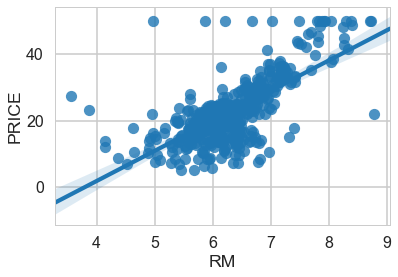

In [24]:
# Scatter plot between *PRICE* and *ROOM*
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True);

### Histograms
***


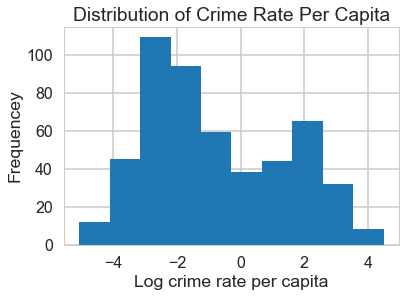

In [25]:
# Histogram of log CRIM
plt.hist(np.log(bos.CRIM))
plt.title("Distribution of Crime Rate Per Capita")
plt.xlabel("Log crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

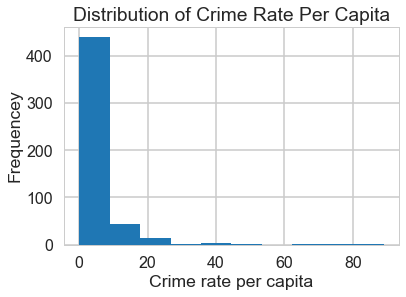

In [26]:
# Histogram of untransformed *CRIM*
plt.hist(bos.CRIM)
plt.title("Distribution of Crime Rate Per Capita")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

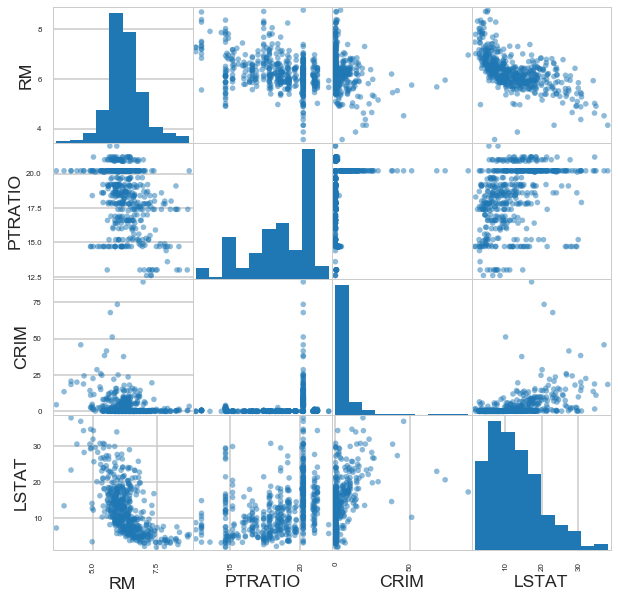

In [27]:
# Scatter plot matrix of selected predictors
pd.plotting.scatter_matrix(bos[['RM', 'PTRATIO', 'CRIM', 'LSTAT']], figsize=(10, 10));

In [28]:
# Correlation matrix of selected predictors
bos[['RM', 'PTRATIO', 'CRIM', 'LSTAT']].corr()

,RM,PTRATIO,CRIM,LSTAT
RM,1.000000,-0.355501,-0.21994,-0.613808
PTRATIO,-0.355501,1.000000,0.28825,0.374044
CRIM,-0.219940,0.288250,1.00000,0.452220
LSTAT,-0.613808,0.374044,0.45222,1.000000


### <font color='brown'> Part 2 Exercise Set II: Answers </font>
#### Log transformation of CRIM
- The variable CRIM has a right skew (mean > median). Taking the log would make the distribution of this variable appear more symmetric/normal. However, this is not a very good reason to log a variable. There are no regression assumptions that require  independent or dependent variables to be normal. 
- There are outliers in CRIM, so a log transformation could reduce the influence of these observations in the model we are going to build.
- Taking the log of a variable may eliminate the unequal variability of a variable across the range of values (heteroscedasticity).
- Transformation may help to make regression residuals normal. 
- Transformation may help to transforms a non-linear model into a linear model (Reference: https://www.quora.com/Why-do-we-log-variables-in-regression-model). 

After log transformation, the variable CRIM seems to have a bimodal deistribtion.

Among the four predictors I have selected, only RM seems to have a near normal distribution. There is a medium negative correlation between RM and LSTAT (-0.61).

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [29]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        01:07:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

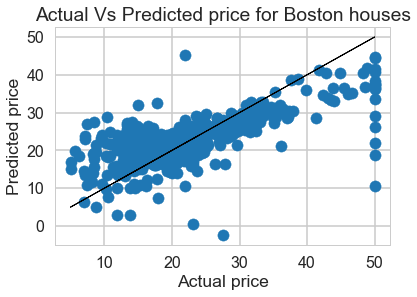

In [31]:
# # Scatter plot of predicted price Vs actual price
plt.scatter(x=bos.PRICE, y=m.fittedvalues)
plt.plot(bos.PRICE, bos.PRICE, color='black', linewidth=1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Vs Predicted price for Boston houses");

In [32]:
min(m.fittedvalues), max(m.fittedvalues)

(-2.258010694455507, 45.24589607832452)

In [33]:
# Print dataframe of actual price vs predicted price with actual price sorted
actual_predicted_df = pd.DataFrame({'actual_price': bos.PRICE, 'predicted_price':m.fittedvalues})
actual_predicted_df.sort_values('actual_price')

,actual_price,predicted_price
398,5.0,14.963179
405,5.0,17.056665
400,5.6,19.823706
399,6.3,18.594921
414,7.0,6.461810
489,7.0,14.608197
401,7.2,23.064056
385,7.2,13.361208
415,7.2,23.892348
387,7.4,10.839924


In [34]:
# Print dataframe of actual price vs predicted price with predicted price sorted 
actual_predicted_df.sort_values('predicted_price')

,actual_price,predicted_price
365,27.5,-2.258011
367,23.1,0.490826
374,13.8,2.993906
406,11.9,2.993906
384,8.8,5.087391
414,7.0,6.461810
412,17.9,7.453940
386,10.5,7.672390
388,10.2,9.747671
144,11.8,9.957020


### <font color='brown'> Part 3 Excercise Set I: Answers </font>
#### Observations about scatter plot between actual price and predicted price

- The model performs poorly for very low-priced and very high-priced houses.
- For one house the model predicted a negative price.
- There are 16 houses where actual price is exactly 50 (see the output of the cell above). I am not sure if theare is some error with this data. For these houses the model performed very poorly.

### Fitting Linear Regression using `sklearn`


In [35]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [36]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [37]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


### <font color='brown'> Part 3 Exercise Set II: Answers </font>

If we set the parameter `fit_intercpet` to False while instantiating LinearRegression object, no intercept will be used for calculation.

In certain cases using intercept doesn't make sense. For instance, if we fit a model to predict housing price from area (square feet) of the house and get an intercept coefficient of 20,000\$. This means that when the house has an area of 0 sqft, the predicted price for this house will be 20,000\$. This does not make sense. In cases like this, it is a good idea to change the model to not fit an intercept term.

However, there are pitfalls when performing a regression without intercept. For instance, $R^2$ is not useful any more. $R^2$ is the amount of variation that is explained by the model. To compute $R^2$, basically, the full model (model with intercept) is compared to the intercept-only-model. In linear regression without intercept, this comparison can not be made. None the less statistics software will produce an $R^2$ for even no-intercept models. But as the interpretation of the $R^2$ is lost we cannot use it for model evaluation ([Why we need intercept](https://statistiksoftware.blogspot.com/2013/01/why-we-need-intercept.html)). So we should be careful while performing regression without intercept. It should only be used in the cases like the one mentioned above.

The linear regression makes the following assumption about residuals (error);

    They are independent
    They have constant variance
    They are normally distributed

If residuals are independent and identically distributed (IID), they meet the first two criteria (differing variances constitute non-identical distributions). However, IID data does not guarantee normal distribution. For instance, in a set of data each datum could be independently drawn from the same uniform distribution; they would be iid, but distribution would not be normal. On the other hand, a set of data can be normally distributed with subsets following different normal distributions (e.g., different means or different variances). In addition, two subsets may be dependent (e.g., the second subset could be generated by adding 1 to every value in the first subset). Therefore, normality of the data does not satisfy IID condition or vice versa ([What is the difference between normal and IID?](https://stats.stackexchange.com/questions/248615/what-is-the-difference-between-normal-and-iid)). 

To use linear regression, response variable does not have to be nomral. Linear regression makes assumption only about normality of residuals as mentioned above.  


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4911032803616


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [41]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

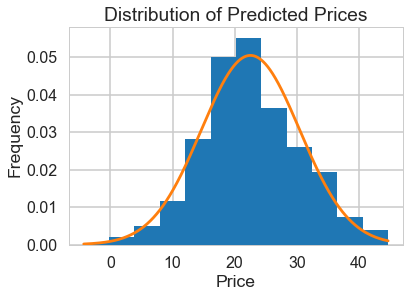

In [42]:
# plot histogram of predicted prices
from scipy.stats import norm
predicted_price = lm.predict(X)
pd.Series(predicted_price).hist(bins=12, density=True)
plt.title('Distribution of Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Overlay a normal curve
avg = np.mean(predicted_price)
std_dev = np.std(predicted_price)
seq = np.linspace(min(predicted_price), max(predicted_price), 10000)
plt.plot(seq, norm.pdf(seq, avg, std_dev));

In [43]:
# Estimate adjusted R^2
sklearn.metrics.r2_score(bos.PRICE, predicted_price)

0.7406077428649428

Text(0.5,1,'Distribution of Predicted Price')

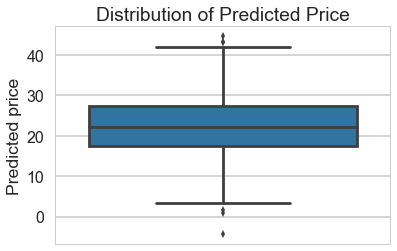

In [44]:
# Plot a boxplot of predicted price to see if there are any outliers
sns.boxplot(y=predicted_price);
plt.ylabel('Predicted price')
plt.title('Distribution of Predicted Price')

In [45]:
# estimate the skew of predicted_price to see if it is noramlly distributed
pd.Series(predicted_price).skew()

0.11110311119419457

In [46]:
# Summary statistics.
pd.Series(predicted_price).describe()

count    506.000000
mean      22.532806
std        7.914896
min       -4.283009
25%       17.447270
50%       22.120625
75%       27.412587
max       44.673399
dtype: float64

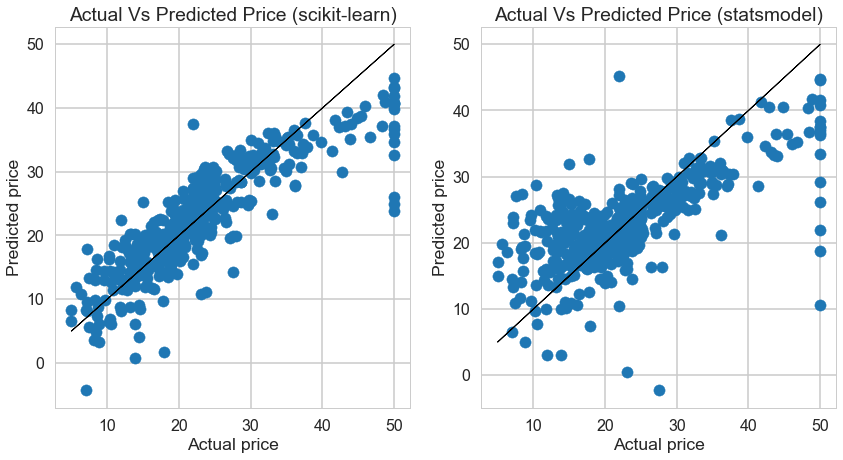

In [47]:
# Comparison of scatter plots of actual vs predicted price obtained from scikit-learn and statsmodel
fig = plt.figure(figsize=(14, 7))
title = ['scikit-learn', 'statsmodel']
for i, j in enumerate([predicted_price, m.fittedvalues]):
    ax = fig.add_subplot(1, 2, i+1)
    ax.scatter(x=bos.PRICE, y=j)
    ax.plot(bos.PRICE, bos.PRICE, color='black', linewidth=1)
    plt.xlabel("Actual price")
    plt.ylabel("Predicted price")
    plt.title(f"Actual Vs Predicted Price ({title[i]})")

In [48]:
# Print dataframe of actual price vs predicted price (scikit-learn) with actual price sorted
actual_predicted_df = pd.DataFrame({'actual_price': bos.PRICE, 'predicted_price':predicted_price})
actual_predicted_df.sort_values('predicted_price')

,actual_price,predicted_price
414,7.0,-4.283009
374,13.8,0.780211
412,17.9,1.693474
384,8.8,3.276465
490,8.1,3.658252
141,14.4,3.983440
438,8.4,4.830032
387,7.4,5.622712
373,13.8,6.120857
386,10.5,6.139031


### <font color='brown'> Part 3 Exercise Set III: Answers </font>
Scikit-learn predicted prices has a low skew of around 0.1, which is generally considered as normal distribution. The distribution has a mean of \$22,532. It has a standard deviation of 7,915 with a range of -4,283 to 44,673. As you can see in the boxplot above, there are a few outliers. However, most of them are close to upper and lower fence. Interestingly, there is one point that has negative price, which does not make much sense. One reason for this outlier could be that this house might have some odd features. However, there is nothing wrong with the original data point which has a price of ~\$7,000. So I would not do anything special with this datapoint.

At the outset (looking at the scatterplots above), scikt-learn seems to have done a better job in fitting the model compared to statsmodel. There is quite a difference between the prices predicted by scikit-learn and statsmodel. For instance, both models have 1 negative predicted price. However, scikit-learn predicted a negative price for a house with an actual price of \$7,000, whereas statsmodel predicted a negative price for a house with an actual price of \$27,500. Interestingly, both the packages perform poorly in predicting price of higher-valued houses.

### Comparison of statsmodels vs scikit-learn

scikit-learn is good for prediction, but not for inference. For instance, for linear models it does not provide diagnostic values like p-values, standard error on each of the coefficients, t-tests etc. All these diagnostic values required to draw inferences are provided by statsmodels. Syntax in statsmodel is similar to R syntax. This is an advantage if one is more familiar with R. 

For some one who is more familiar with python, scikit-learn is much easier to learn as it is more pythoninc. Scikit-learn uses a simple modular approach for all its functions (fit->transform->predict) and hence it is easy to learn. Furthermore, scikit-learn has much better documentation compared to statsmodels which is relatively new package (https://www.quora.com/What-are-the-advantages-and-disadvantages-of-using-Statsmodels-over-Scikit-learn).

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [49]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [50]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31636.019130869827


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [51]:
m1 = ols('PRICE ~ PTRATIO',bos).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.61e-34
Time:                        01:07:27   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### <font color='brown'> Part 3 Exercise Set IV: Answers </font>

The regression coefficient of -2.1572 for PTRATIO  means that on average, one unit increase in PTRATIO is associated with a decrease of \$2,157 in house price net of the other variables. Intercept coefficient is  62.3446. This can be interpreted as *the average house price will be \$62,345 when PTRATIO is zero*, which in this case does not make sense.

$R^2$ for the model is 0.258 (adjusted $R^2$ is 0.256). This means that model could explain only 25.8% of the variance in the repsonse variable (PRICE).

*F*-statistic is 175.1 with a *p*-value close to zero indicating that coefficient of -2.1572 for PTRATIO is statistically significant (PTRATIO is statistically significant predictor of house PRICE).

In this case of simple linear regression, *F*-statistic is square of *t*-statistic.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [52]:
# Fit the model with three predictors using statsmodels
m2 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.09e-97
Time:                        01:07:27   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='brown'> Part 3 Exercise Set V: Answers </font>
*F*-statistic is 244.2 with a *p*-value close to zero, indicating coefficient of at least one of the three predictors used in the model is statistically significant (non-zero).

$R^2$ for the model is 0.593 (adjusted $R^2$ is 0.591). This means, that model could explain only 59.3% of the variance in the repsonse variable (PRICE).

The regression coefficients of all of the three variables (CRIM, RM, PTRATIO) are statistically significant (*p*-value close to zero). So all three variables are significant in predicting the house price. The variable CRIM and PTRATIO have negative effect on house price, whereas RM has positive effect.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [53]:
# Fit the model with four predictors using statsmodels
m3 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          6.39e-123
Time:                        01:07:28   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.000       9.188      24.799
CRIM          -0.0640      0.031     -2.081      0.038      -0.124      -0.004
RM             4.6126      0.427     10.802      0.000       3.774       5.452
PTRATIO       -0.8909      0.119     -7.498      0.000      -1.124      -0.657
LSTAT         -0.5356      0.046    -11.761      0.000      -0.625      -0.446
==============================================================================
Omnibus:                      219.361   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1213.591
Skew:                           1.837   Prob(JB):                    2.96e-264
Kurtosis:                       9.638   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Conducting F-test to compare two models m2 and m3
from statsmodels.stats.anova import anova_lm
anova_lm(m2, m3)

C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,17367.841062,0.0,NaN,NaN,NaN
1,501.0,13610.373548,1.0,3757.467514,138.312973,2.287024e-28


### <font color='brown'> Part 4 Exercise: Answers </font>

Based on the following metrics, we can conclude that the full model (CRIM + RM + PTRATIO + LSTAT) performs better compared to reduced model (CRIM + RM + PTRATIO).

The full model explains 67.9% (adjusted $R^2^ = 0.679) variance in the response variable, whereas the reduced model explains only 59.1% variance in the response variable.

The full model has lower AIC (3112) compared to reduced model (3233)

Statistically signficant *F*-statistic also suggest that full model performs better.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

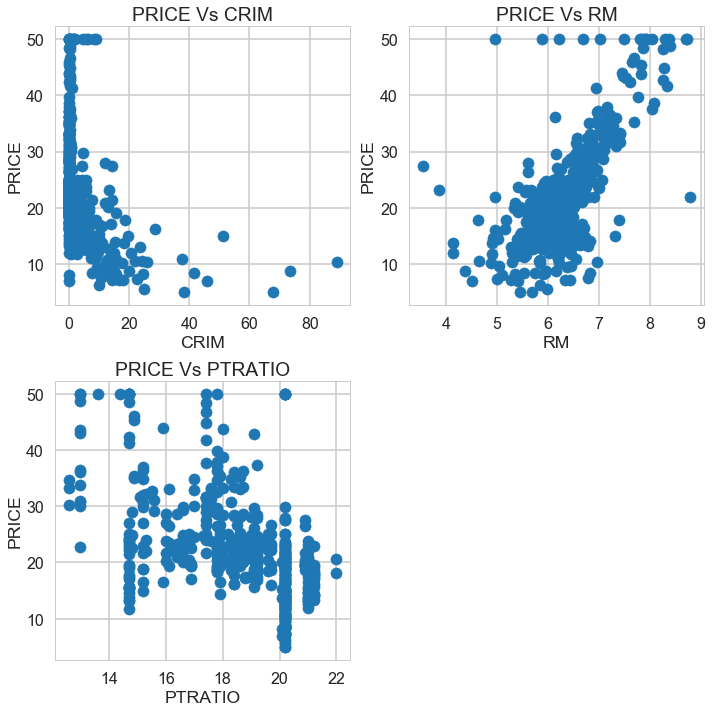

In [55]:
# Scatter plot of three predictors vs PRICE to check if the relationship between predictors and PRICE is linear 

predictors = ['CRIM', 'RM', 'PTRATIO']
fig = plt.figure(figsize=(10, 10))

for i, j in enumerate(predictors):
        ax = fig.add_subplot(2, 2, i+1)
        ax.scatter(bos[j], bos['PRICE'])
        plt.xlabel(j)
        plt.ylabel('PRICE')
        plt.title(f'PRICE Vs {j}')
        plt.tight_layout()

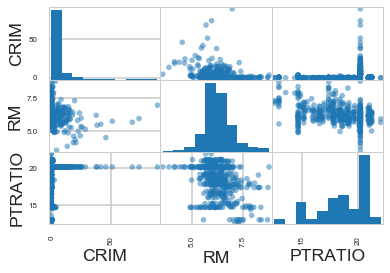

In [56]:
# Correlation among predictors
pd.plotting.scatter_matrix(bos[['CRIM', 'RM', 'PTRATIO']]);

In [57]:
# Correlation among predictors
bos[['CRIM', 'RM', 'PTRATIO']].corr()

,CRIM,RM,PTRATIO
CRIM,1.00000,-0.219940,0.288250
RM,-0.21994,1.000000,-0.355501
PTRATIO,0.28825,-0.355501,1.000000


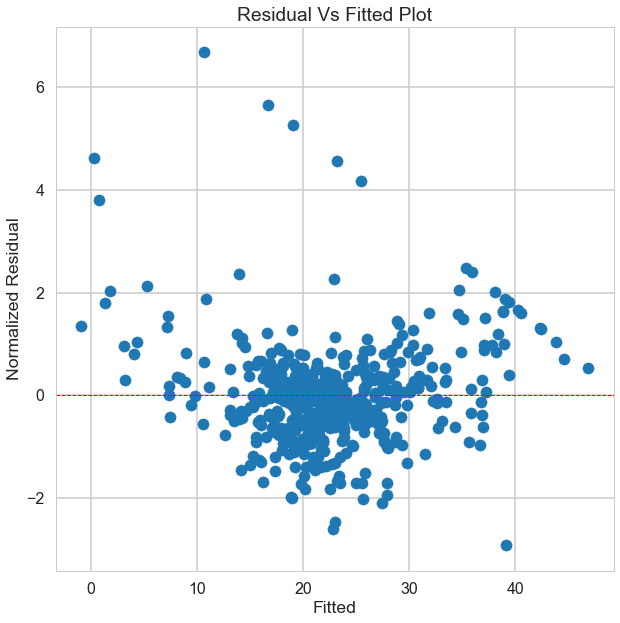

In [58]:
# Residual Vs fitted values plot
fig = plt.figure(figsize=(10, 10))
plt.scatter(m2.fittedvalues, m2.resid_pearson)
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.xlabel('Fitted')
plt.ylabel('Normalized Residual')
plt.title('Residual Vs Fitted Plot');

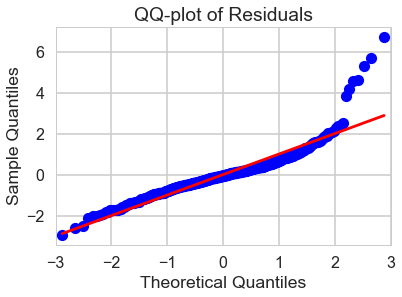

In [59]:
# Quantile plot of residuals
import statsmodels.api as sm
sm.qqplot(m2.resid, line='s', fit=True)
plt.title('QQ-plot of Residuals');

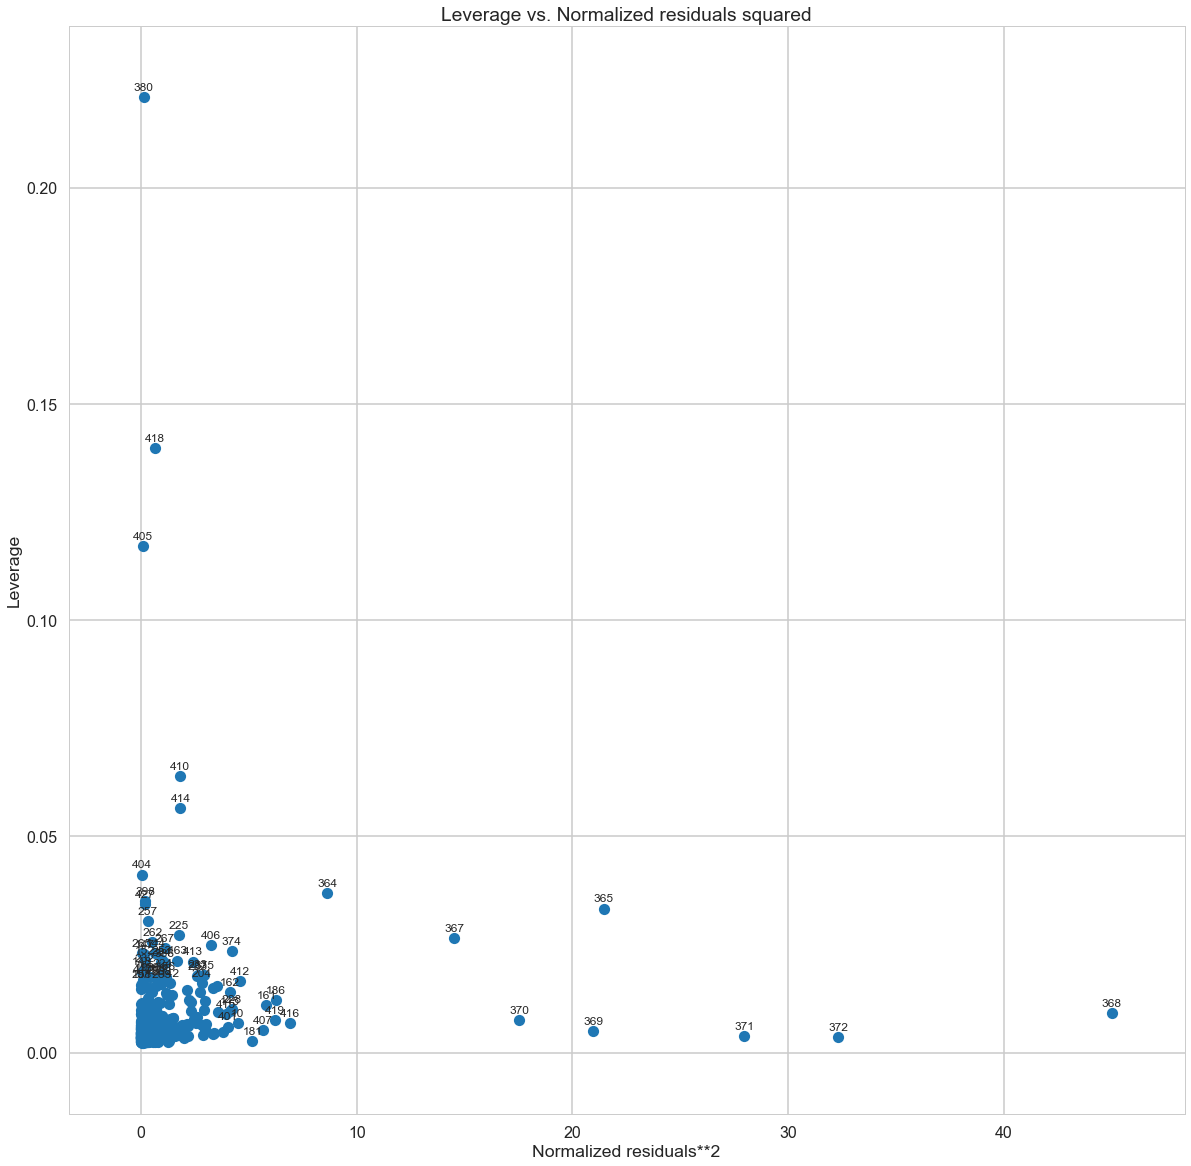

In [60]:
# Leverage-Resid2 Plot
fig, ax = plt.subplots(figsize=(20,20))
fig = sm.graphics.plot_leverage_resid2(m2, ax=ax)

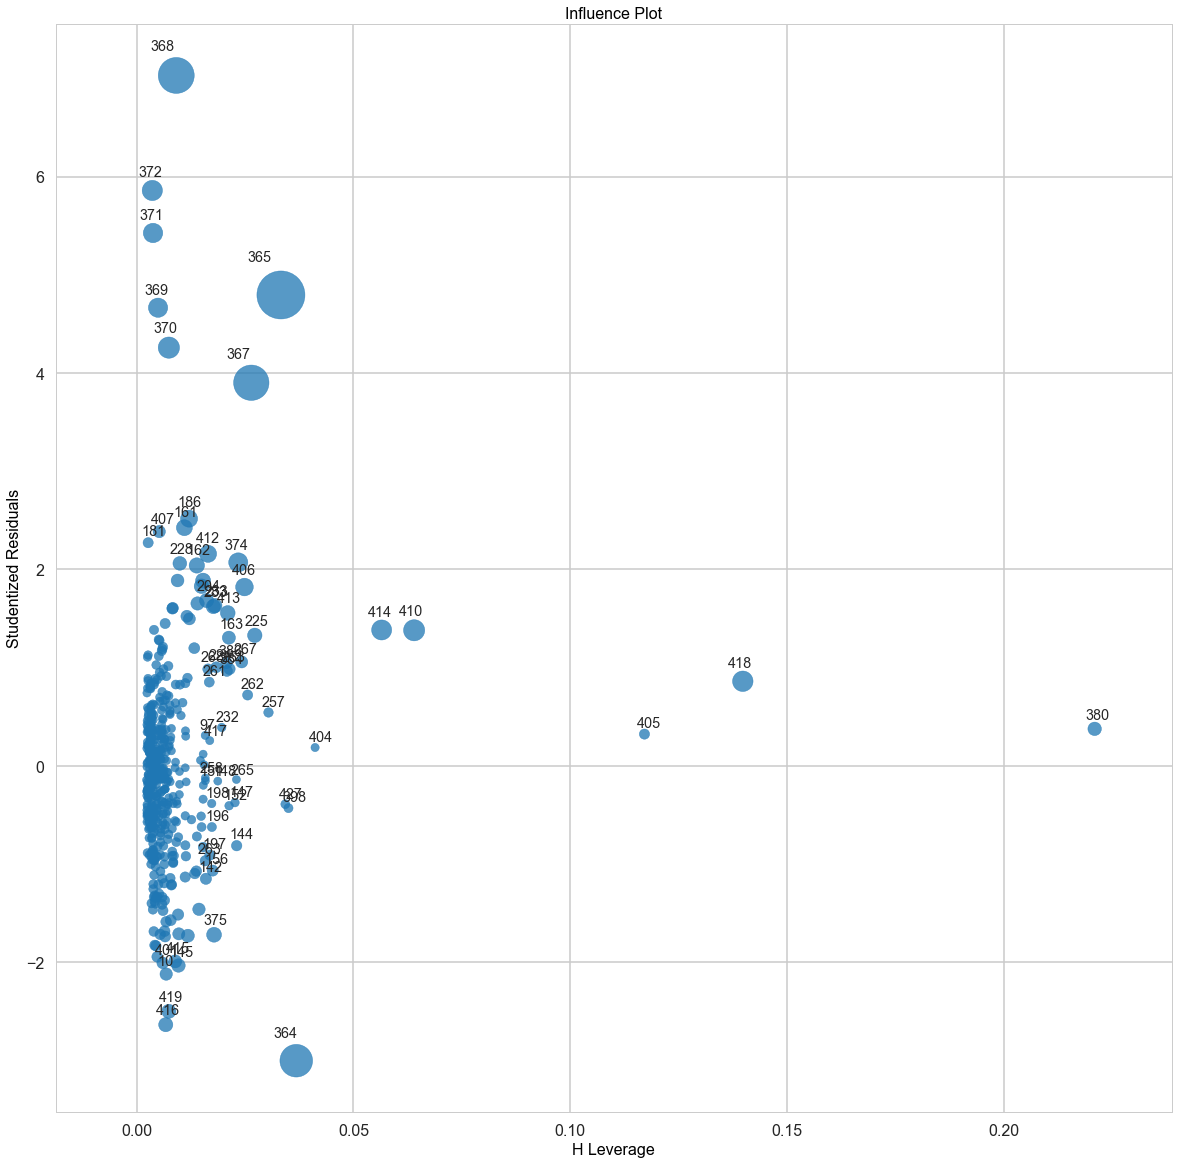

In [61]:
# Influence Plot
fig, ax = plt.subplots(figsize=(20, 20))
fig = sm.graphics.influence_plot(m2, ax=ax)

In [62]:
# Drop the high leverage/influence points identified in the above two plots. Although there are more high leverage points, 
# I dropped only obvious ones.
drop_indeces = [380, 418, 405, 410, 414, 404, 364, 367, 365, 370, 369, 371, 372, 368]
bos_reduced = bos.drop(drop_indeces)

In [63]:
# Verify the outliers closely
bos.iloc[drop_indeces]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.97620,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.53410,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.13580,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
404,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0


In [64]:
# Fit the model for reduced dataset with outliers removed
m4 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_reduced).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     440.4
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          2.14e-138
Time:                        01:07:37   Log-Likelihood:                -1443.6
No. Observations:                 492   AIC:                             2895.
Df Residuals:                     488   BIC:                             2912.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1219      3.267     -2.792      0.005     -15.540      -2.703
CRIM          -0.3317      0.040     -8.241      0.000      -0.411      -0.253
RM             8.1798      0.334     24.483      0.000       7.523       8.836
PTRATIO       -1.0349      0.106     -9.785      0.000      -1.243      -0.827
==============================================================================
Omnibus:                       27.125   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.645
Skew:                           0.377   Prob(JB):                     7.43e-11
Kurtosis:                       4.307   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

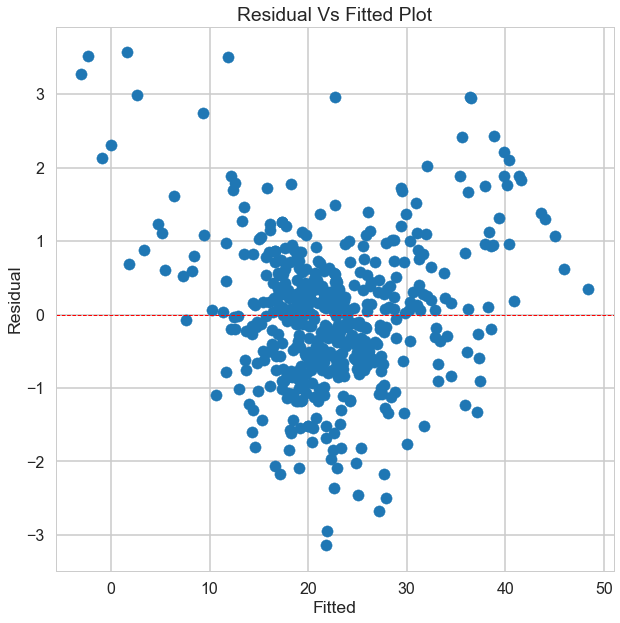

In [65]:
# Residual Vs fitted values plot after removing outliers
fig = plt.figure(figsize=(10, 10))
plt.scatter(m4.fittedvalues, m4.resid_pearson)
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual Vs Fitted Plot');

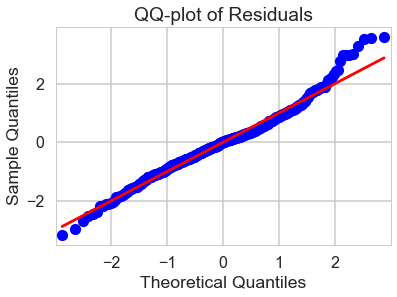

In [66]:
# Quantile plot of residuals  after removing outliers
import statsmodels.api as sm
sm.qqplot(m4.resid, line='s', fit=True)
plt.title('QQ-plot of Residuals');

### <font color='brown'> Part 5 Exercise: Answers </font>

A residuals vs. fitted plot should be relatively shapeless without clear patterns in the data, no obvious outliers, and nearly symmetrically distributed around the 0 line without particularly large residuals if the relationship between predictor and response variables is linear (i.e. linearity) and there is equal variance along the regression line (i.e. homoscedasticity) (https://medium.com/data-distilled/residual-plots-part-1-residuals-vs-fitted-plot-f069849616b1).

In the residuals vs. fitted plot (before outliers removed) above we can see a slight curvature in the data points indicating the violation of linearity assumption. The plot also indicates that the variance along regression line is not equal (heteroscedasticity).

The quantile plot above suggests that residuals are not quite normal. This seems to be mainly due to seven outliers.

On residuals vs. fitted plot, it is easy to check whether the relationship between predictor and response variables is linear (i.e. linearity) and whether there is equal variance along the regression line. However, it is bit difficult to see if residuals are normally distributed. On the other hand, on qq-plot it is much easier to check whether residuals are normally distributed, but difficult to check linearity and homoscedasticity.

In residuals vs. fitted plot, we can easily see seven outliers which are more than 3 SD away. These outliers may be due to some houses having odd features. For instance, in one area, average rooms in houses is ~6, but average price is very cheap at \$8,800. This is probably because houses in this area are very old (100% houses built before 1940). We have not included AGE variable in the model. Furthermore, the house price depends on many more variabels than just PTRATIO, RM and CRIM.  

Leverage-Resid2 Plot and Influence Plot indicate that there are more than 30 high leverage points. As mentioned above the house price is dependent on many variables, but we have data for only few variables and even within those, we included only three variables in the model

I removed the 14 most obvious high leverage points and fit the mode. This improves the adjusted $R^2$ from 59.1% to 72.9%. Residuals also now has nearly normal distribution.